In [2]:
# import the necessary packages
from matplotlib.colors import PowerNorm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import os

In [3]:
# specify the path to the EM-DAT dataset
emdat_dataset_path = os.path.join(
    "natural-disasters-data",
    "em-dat",
    "EMDAT_1900-2021_NatDis.csv"
)

# load the EM-DAT natural disasters dataset from disk
df = pd.read_csv(emdat_dataset_path)
df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845


In [4]:
# grab all data for tornadoes
tornado_df = df[df["Disaster Subsubtype"] == "Tornado"]
tornado_df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
35,1912-0021-CAN,1912,21,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,30.0,28.0,200.0,NaN,2500.0,2700.0,NaN,NaN,5000.0,3.783211
197,1950-0012-CAN,1950,12,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431937
208,1951-0005-COM,1951,5,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,4.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.175534
401,1966-0115-BEL,1966,115,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Govern,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.696028
438,1967-0108-BEL,1967,108,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Affect,...,25.0,NaN,100.0,NaN,NaN,100.0,NaN,NaN,NaN,13.048062


In [5]:
# count the number of times tornadoes have happened in each country
tornado_counts = tornado_df["ISO"].value_counts()

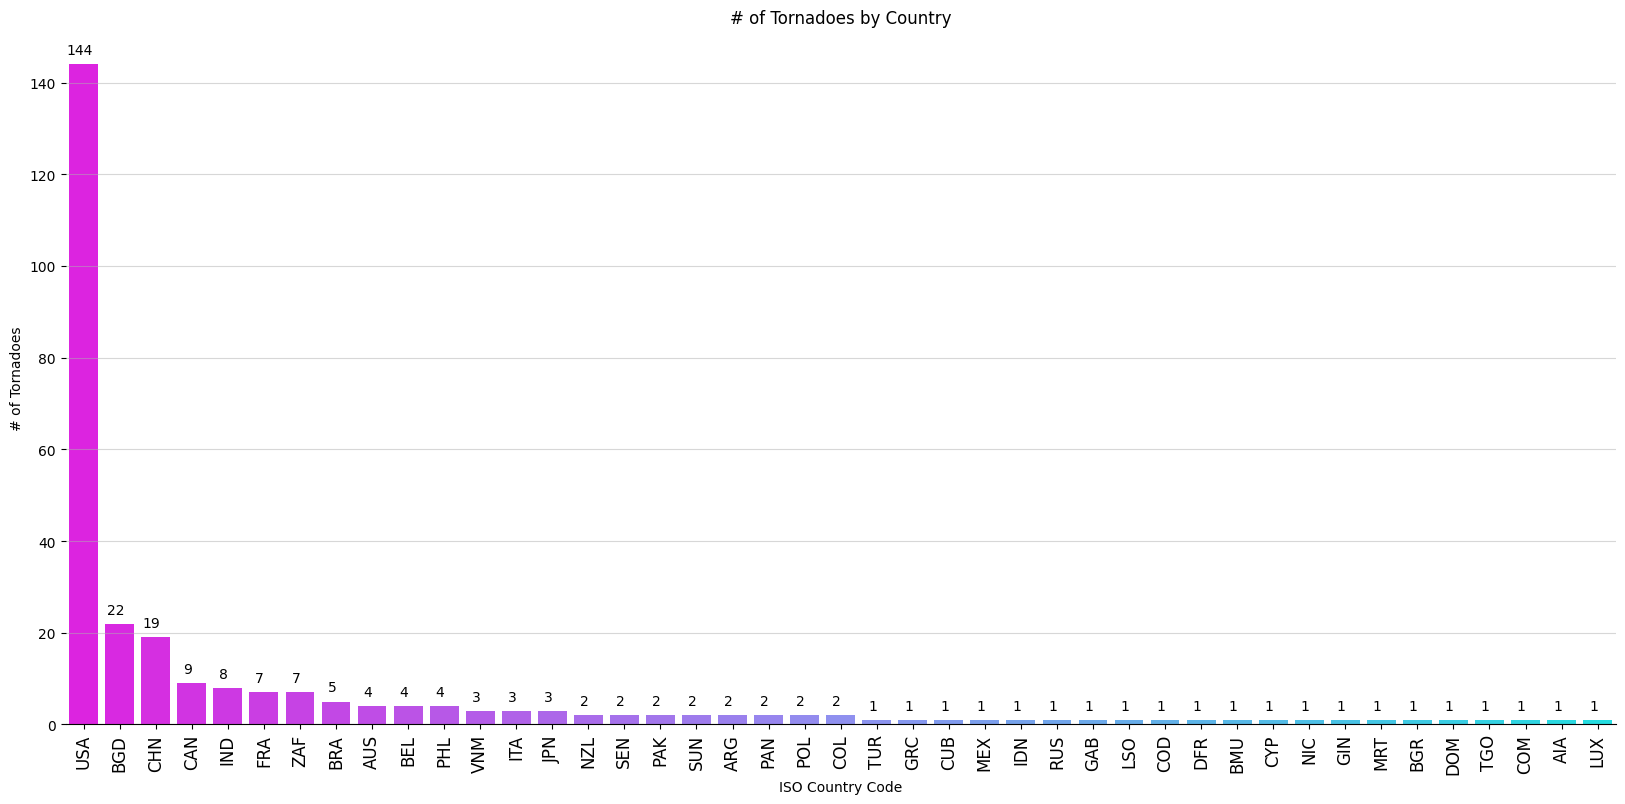

In [6]:
# initialize our figure and set tick information
plt.figure(figsize=(20, 9))
plt.xticks(rotation=90, fontsize=12)
sns.despine(top=True, right=True, bottom=False, left=True)

# plot the tornado count per country
ax = sns.countplot(
    data=tornado_df,
    x="ISO",
    order=tornado_counts.index,
    palette="cool_r"
)
ax.grid(axis="y", alpha=0.5)

# loop over the patches for each individual bar
for p in ax.patches:
    # draw the tornado count for the current country
    ax.annotate(
        "{}".format(int(p.get_height())),
        (p.get_x() + (p.get_width() / 2.0), abs(p.get_height())),
        ha="center",
        va="bottom",
        rotation="horizontal",
        color="black",
        xytext=(-3, 5),
        textcoords="offset points"
    )

# set the axis labels and plot title
ax.set_xlabel("ISO Country Code")
ax.set_ylabel("# of Tornadoes")
plt.title("# of Tornadoes by Country")
plt.show()

In [7]:
# load the low resolution world map
world_df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# add the tornado counts for each country to the dataframe, filling in any
# empty any tornado counts with zero
world_df = world_df.merge(
    tornado_counts,
    left_on="iso_a3",
    right_on="ISO",
    how="left"
)
world_df = world_df.rename(columns={"count": "Tornado Counts"})
world_df["Tornado Counts"] = world_df["Tornado Counts"].fillna(0)
world_df.head()

/var/folders/k4/l411pq3x09vb8vh81m4x0g740000gn/T/ipykernel_34234/1926849238.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Tornado Counts
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",9.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",144.0


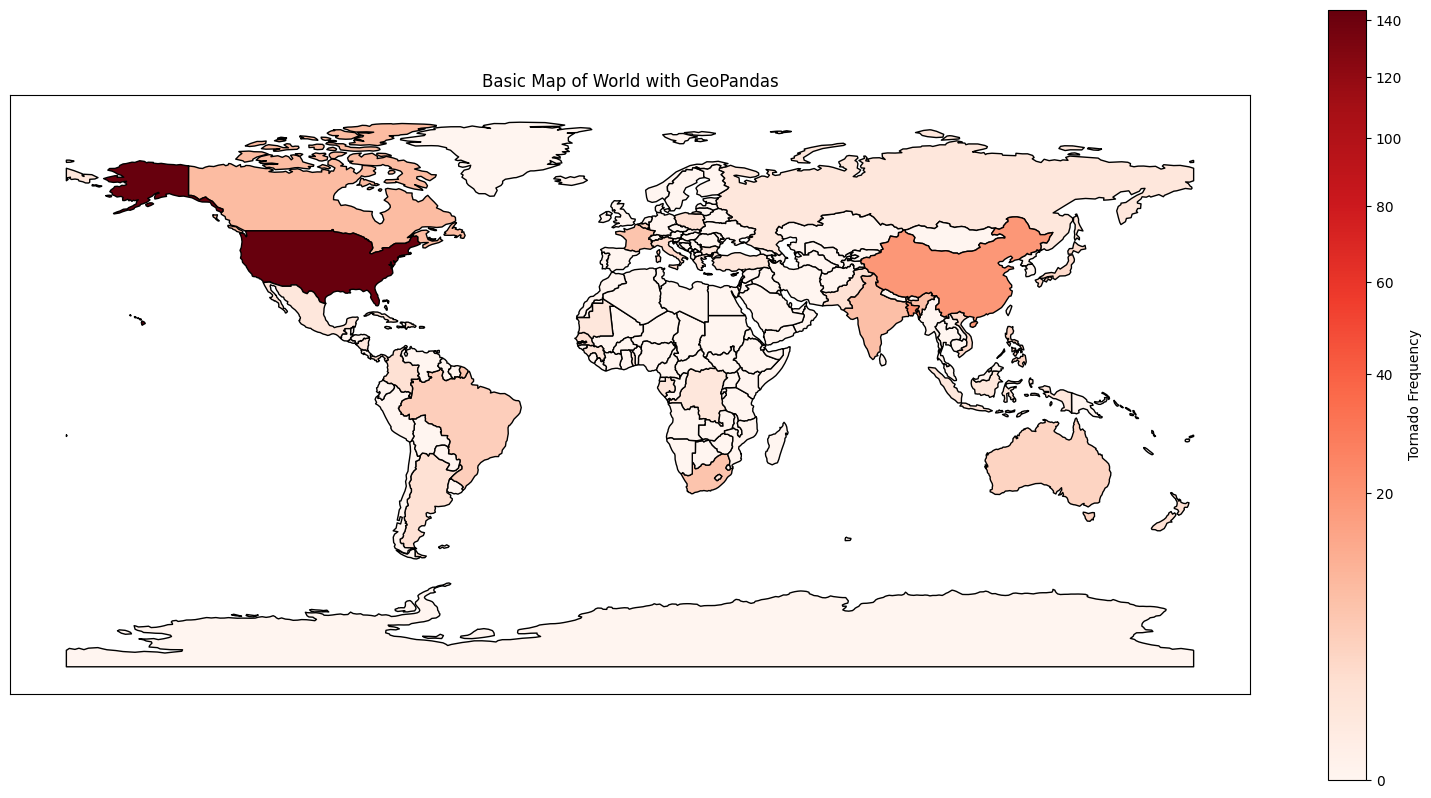

In [8]:
# initialize an empty figure and add an axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# the United States has *far* more tornadoes than any other country, so to
# plot a heatmap of worldwide tornado frequency, let's compute a square-root
# norm, that way other countries don't look "washed out" in the visualization
norm = PowerNorm(
    gamma=0.5,
    vmin=world_df["Tornado Counts"].min() + 1e-7,
    vmax=world_df["Tornado Counts"].max() + 1e-7
)

# plot a heatmap of tornadoes per country
world_df.plot(
    ax=ax,
    column="Tornado Counts",
    cmap="Reds",
    norm=norm,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Tornado Frequency"}
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Basic Map of World with GeoPandas")
plt.show()

In [9]:
# filter our dataframe to include tornado data from *only* the top-5 countries
filtered_df = tornado_df[tornado_df["ISO"].isin(tornado_counts[:5].index)]

In [10]:
# group the filtered dataframe by country and year, then count the number of
# tornadoes
grouped = filtered_df.groupby(["ISO", "Year"]).size().reset_index(name="Count")
grouped

,ISO,Year,Count
0,BGD,1972,1
1,BGD,1976,2
2,BGD,1977,1
3,BGD,1981,1
4,BGD,1983,1
...,...,...,...
90,USA,2016,1
91,USA,2017,3
92,USA,2018,1
93,USA,2019,3


In [11]:
# pivot the grouped data such that the year becomes the index, each unique
# country has a colunmn, and the values become the tornado counts
pivot_df = grouped.pivot(index="Year", columns="ISO", values="Count")
pivot_df = pivot_df.fillna(0)
pivot_df

ISO,BGD,CAN,CHN,IND,USA
Year,,,,,
1903,0.0,0.0,0.0,0.0,1.0
1912,0.0,1.0,0.0,0.0,0.0
1913,0.0,0.0,0.0,0.0,1.0
1920,0.0,0.0,0.0,0.0,1.0
1925,0.0,0.0,0.0,0.0,1.0
1927,0.0,0.0,0.0,0.0,1.0
1932,0.0,0.0,0.0,0.0,1.0
1936,0.0,0.0,0.0,0.0,1.0
1950,0.0,1.0,0.0,0.0,0.0


In [12]:
# compute the cumulative sum of tornadoes for each country
cumulative_df = pivot_df.cumsum()
cumulative_df

ISO,BGD,CAN,CHN,IND,USA
Year,,,,,
1903,0.0,0.0,0.0,0.0,1.0
1912,0.0,1.0,0.0,0.0,1.0
1913,0.0,1.0,0.0,0.0,2.0
1920,0.0,1.0,0.0,0.0,3.0
1925,0.0,1.0,0.0,0.0,4.0
1927,0.0,1.0,0.0,0.0,5.0
1932,0.0,1.0,0.0,0.0,6.0
1936,0.0,1.0,0.0,0.0,7.0
1950,0.0,2.0,0.0,0.0,7.0


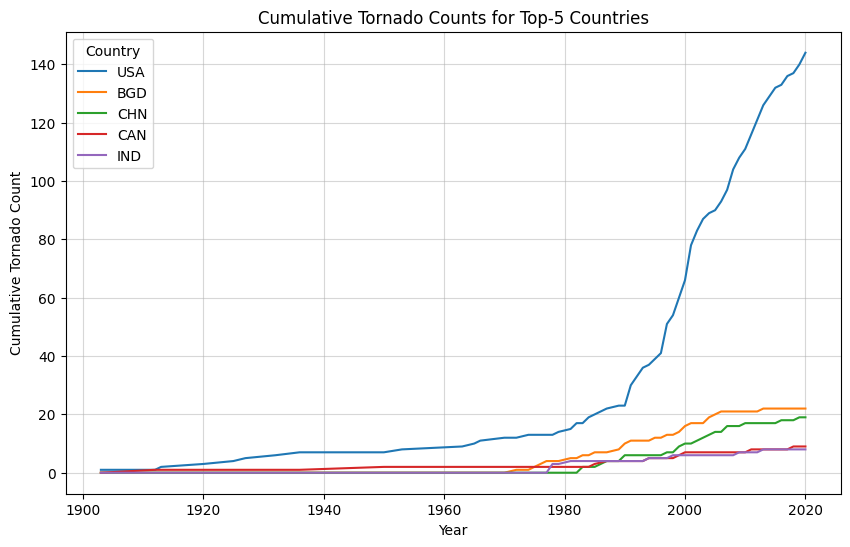

In [13]:
# determine the order in which the countries are plotted by their final
# cumulative tornado count (descending order)
sorted_countries = cumulative_df.iloc[-1].sort_values(ascending=False).index

# plot the cumulative sum of tornadoes
cumulative_df[sorted_countries].plot(figsize=(10, 6))

# finish creating the plot
plt.grid(alpha=0.5)
plt.title("Cumulative Tornado Counts for Top-5 Countries")
plt.xlabel("Year")
plt.ylabel("Cumulative Tornado Count")
plt.legend(title="Country")
plt.show()